<h2>Gebruikte pluralsight courses</h2><br>
Introduction to Data Visualization with Python
by YK Sugi
https://app.pluralsight.com/library/courses/data-visualization-with-python-introduction/table-of-contents
Gebruikt voor informatie over Jupyter, Pandas en matplotlib, waarmee tal van grafieken gemaakt kunnen worden.
Een duidelijke cursus die de nodige uitleg geeft.<br>

Importing Data from Microsoft Excel Files with Python
by Gabriel Cánepa
https://app.pluralsight.com/guides/importing-data-from-excel-with-python
Gebruikt voor informatie over openpyxl en hoe hiermee data gelezen kan worden uit Excel files, alsook hoe data of grafieken weggeschreven kunnen worden naar een Excel file.
Een korte cursus, met overzichtelijke code voorbeelden.

In [1]:
import openpyxl
import matplotlib
from Voetbal.Graphs import visual as visual
from Voetbal.Spelertjes import Spelertjes

import openpxl om data in te lezen en data weg te schrijven naar xlsx file<br>
import methodes uit andere python files om later te gebruiken.

In [2]:
spelertjes = Spelertjes()
graphs = visual()

Maak objecten aan met de geïmporte objecten

In [3]:
fileName = 'voetbal.xlsx'
sheetName = 'gegevens'
saveFileName = 'correct.xlsx'

spelertjes.readFile(fileName, sheetName)
spelertjes.writeFile(fileName, sheetName, saveFileName)

fileName = saveFileName
sheetName = "grafiek"

lees de excel file voetbal in en ga naar tab 'gegevens'. Maak deze file inorde (dubbele kolom verwijderen) en vul de data. Save daarna de file met de naam 'correct.xlsx'<br>
De filename gaat daarna op de saveFileName gezet worden (zodat we het correcte bestand gebruiken met de juiste data op de juiste plaats). We veranderen ook de sheetname voordat we de methodes uitvoeren.<br>
De grafieken zijn nu ook tezien in de excel file (in een veel minder goede vorm)

In [12]:
def writeFile(self, fileName, sheetName, saveFileName):
    wb = load_workbook(fileName)
    ws = wb[sheetName]

    font = Font(name='Calibri',size=12,bold=True)
    header = ["naam", "positie", "aantal gemaakte goalen", "geboortecategorie", "inzet", "gewicht", "lengte","geboortedatum"]

    #fill the headers with the right values
    for i in range(len(header)):
        cellref = ws.cell(1,i+1)
        cellref.value = header[i]
        cellref.font = font
        #clear last column
        cellref = ws.cell(1,i+2)
        cellref.value = None
        
        #fill gegevens with new generated values
        for i in range(len(self.spelertjesValues)):
            for j in range(len(self.spelertjesValues[i])):
                cellref = ws.cell(row=i+2, column=j+1)
                cellref.value = self.spelertjesValues[i][j]
                #clear last column
                cellref = ws.cell(row=i + 2, column=j + 2)
                cellref.value = None

        wb.save(saveFileName)

#other code user to fill spelertjes (in comment so it doesnt do anything)
#for row in ws.rows:
        #     args = [cell.value for cell in row]
        #     birthDate = self.generateBirth()
        #     spelertje = Spelertje(args[0], args[2], args[3], self.returnCat(birthDate),self.effort[self.returnCat(birthDate)], args[6],args[7], birthDate)
        #     self.spelertjesValues.append(spelertje.returnArray())
        #     self.addSpeler(spelertje)

    Om de date te vullen gebruiken we een methode generateBirth. Hier gaat er een random datum gegenereerd worden tussen  01-01-2011 en, 31-12-2011. We gebruiken dan deze datum om de categorie toe te wijzen aan het spelertje. Dit wordt gedaan met de methode returnCat. De volledige Code kan je op het einde terugvinden.

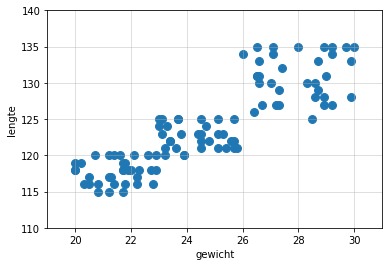

In [5]:
graphs.drawScatterChart(fileName, sheetName, fileName)

plot the scatter chart

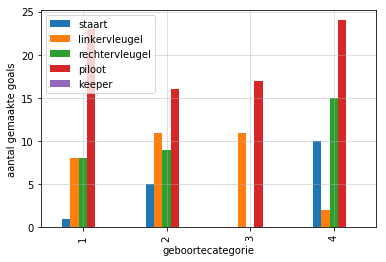

In [6]:
graphs.drawBarChart(fileName,sheetName,fileName)

<H3>Bespreking staafdiagram</H3><br>
Per geboortecategorie, wordt er nog een opdeling gemaakt volgens positie (staart, linkervleugel, ...).
Aan de hand van de beschikbare data, wordt vervolgens voor elke positie in elke geboortecategorie het aantal goals getekend met een staaf. Via de y-as is dan een schatting van het aantal goals zienbaar.
Uit deze gegevens blijkt dat piloten bijna altijd de meeste goals scoren, op een gedeelde tweede plaats de linker- en rechtervleugel, op de derde plaats de staart en tot slot als laatste de keeper, die in deze dataset geen goals gescoord heeft.

In [7]:
graphs.averageAndModus(fileName)

modus : 
staart :0
linkervleugel :1
rechtervleugel :1
piloot :4
keeper :0

Average Goals : 
staart : 0.8
linkervleugel : 1.6
rechtervleugel : 1.6
piloot : 4.0
keeper : 0.0


<h3>Bepsreking modus en gemiddelde</h3><br>
Aan de hand van deze gegevens kunnen we zien dat het meeste voorkomde aantal gemaakte goals bij de keepers en bij de staart 0 is, bij de linker en de rechtervleugel 1 is en bij de piloot 4. <br>
het gemmiddelde van de aantal gemaakte goals per positie is voor de staart 0.8, voor de linker-en rechtervleugel 1.6, voor de keepers 0 en voor de piloot 4. Zo kunnen we vaststellen dat de piloot het belangrijkste is bij het aantal gemaakte goals. 

In [8]:
graphs.calculateQuartileAndStd(fileName)

Kwartiel 1 : 22.075000000000003
standaard afwijking : 2.8691211197856394


//TODO bespreek

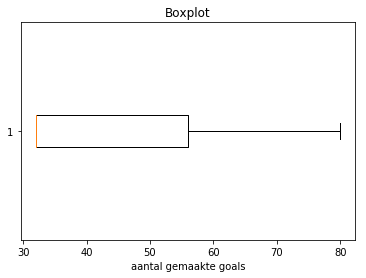

In [9]:
graphs.drawBoxPlot(fileName)

In [ ]:
//TODO bespreek

Hier is de bijgevoegde code die we geschreven hebben ter verduidelijking.

In [1]:
from openpyxl import load_workbook
from openpyxl.chart.series import Series
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Voetbal.Spelertjes import Spelertjes
from openpyxl.chart import (
    ScatterChart,
    Reference,
    Series,
    marker,
    BarChart
)

class visual:

    def drawScatterChart(self, fileName, sheetName, saveFileName = None):

        if saveFileName is None:
            saveFileName = fileName

        wb = load_workbook(fileName)
        ws = wb['gegevens']

        chart = ScatterChart()
        chart.title = "Scatter Chart"
        chart.style = 13
        chart.x_axis.scaling.min = 19
        chart.x_axis.scaling.max = 31
        chart.y_axis.scaling.min = 110
        chart.y_axis.scaling.max = 140
        chart.x_axis.title = 'gewicht'
        chart.y_axis.title = 'lengte'

        chart.legend = None

        xvalues = Reference(ws, min_col=6, min_row=2, max_row=101)
        values = Reference(ws, min_col=7, min_row=2, max_row=101)
        #fill x and y, skip first
        x=[]
        y=[]
        iterrows = iter(ws.rows)
        next(iterrows)
        for row in iterrows:
            x.append(row[5].value)
            y.append(row[6].value)

        series = Series(values, xvalues)
        series.graphicalProperties.line.noFill = True

        series.marker = marker.Marker('circle', 5.2)

        chart.series.append(series)

        # Style the lines
        s1 = chart.series[0]
        s1.marker.symbol = "circle"
        s1.marker.graphicalProperties.solidFill = "4076A9"  # Marker filling
        s1.marker.graphicalProperties.line.solidFill = "4076A9"  # Marker outline

        s1.graphicalProperties.line.noFill = True

        ws = wb[sheetName]

        ws.add_chart(chart, "L7")

        wb.save(saveFileName)

        area = np.pi * 20
        plt.scatter(x, y, s=area, alpha=1)
        plt.xlabel("gewicht")
        plt.ylabel("lengte")
        plt.grid(True,alpha=0.5)
        plt.axis([19,31,110,140])
        plt.show()


    def drawBarChart(self, fileName, sheetName, saveFileName = None):
        spelertjes = Spelertjes()
        if saveFileName is None:
            saveFileName = fileName
        #read all the data using openpyxl and write data to grafiek tab
        wb = load_workbook(fileName)
        ws = wb['gegevens']


        goals = {"staart":{1:0,2:0,3:0,4:0}, "linkervleugel":{1:0,2:0,3:0,4:0},"rechtervleugel":{1:0,2:0,3:0,4:0},
                 "piloot":{1:0,2:0,3:0,4:0},"keeper":{1:0,2:0,3:0,4:0}}

        positions = ["staart","linkervleuger","rechtervleuger","piloot","keeper"]

        iterrows = iter(ws.rows)
        next(iterrows)

        for row in iterrows:
            position = goals[row[1].value]
            position[row[3].value] += row[2].value
            goals[row[1].value] = position
        ws = wb['grafiek']

        for i in range(2,6):
            cellref = ws.cell(1, i)
            cellref.value = i - 1

        for i in range(2,7):
            cellref = ws.cell(i, 1)
            cellref.value = positions[i-2]
        row = 2

        for i in goals.values():
            column = 2
            for j in i.values():
                cellref = ws.cell(row, column)
                cellref.value = j
                column += 1
            row += 1

        chart1 = BarChart()
        chart1.type = "col"
        chart1.style = 10
        chart1.title = "goals per position per birth cat"
        chart1.y_axis.title = 'goals'
        chart1.x_axis.title = 'position'

        data = Reference(ws, min_col=2, min_row=1, max_row=6, max_col=5)
        cats = Reference(ws, min_col=1, min_row=1 , max_row=6)
        chart1.add_data(data,titles_from_data=True)
        chart1.set_categories(cats)
        chart1.shape = 4
        ws.add_chart(chart1, "C24")
        wb.save(saveFileName)

        pd.DataFrame(goals).plot(kind='bar')
        plt.xlabel("geboortecategorie")
        plt.ylabel("aantal gemaakte goals")
        plt.grid(True, alpha=0.5)
        plt.show()



    def averageAndModus(self, fileName,):
        # read all the data using openpyxl and write data to grafiek tab
        wb = load_workbook(fileName)
        ws = wb['gegevens']

        goals = {"staart": 0, "linkervleugel": 0,
                 "rechtervleugel": 0,
                 "piloot": 0, "keeper": 0}

        # count amount of players in cat | is always 20 but just in case it changes...
        goalsCounter = {"staart": 0, "linkervleugel": 0,
                 "rechtervleugel": 0,
                 "piloot": 0, "keeper": 0}

        averageGoals = {"staart": 0, "linkervleugel": 0,
                 "rechtervleugel": 0,
                 "piloot": 0, "keeper": 0}

        modus = {"staart":{0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0}, "linkervleugel":{0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0},
                 "rechtervleugel":{0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0},
                 "piloot":{0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0},"keeper":
                     {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0}}

        iterrows = iter(ws.rows)
        next(iterrows)
        for row in iterrows:
            temp = modus[row[1].value]
            temp[row[2].value] += 1
            modus[row[1].value] = temp
            goalsCounter[row[1].value] += 1
            goals[row[1].value] += row[2].value


        for i in goals:
            averageGoals[i] = goals[i]/goalsCounter[i]
        #still need to write this to excel file
        print("modus : ")
        for pos in modus:
            print(str(pos)+ " :"+ str(max(modus[pos], key=modus[pos].get)))
        print()
        print("Average Goals : ")
        for goal in averageGoals:
            print(str(goal) + " : " + str(averageGoals[goal]))

    def calculateQuartileAndStd(self,fileName):
            # read all the data using openpyxl and write data to grafiek tab
        wb = load_workbook(fileName)
        ws = wb['gegevens']

        data = []
        #skip first row
        iterrows = iter(ws.rows)
        next(iterrows)
        for row in iterrows:
            data.append(row[5].value)
        #calculate std and quartile 1
        print("Kwartiel 1 : " + str(np.percentile(data,25)))
        print("standaard afwijking : " + str(np.std(data)))

    def drawBoxPlot(self,fileName):
        wb = load_workbook(fileName)
        ws = wb['gegevens']

        data = {"linkervleugel":0,"rechtervleugel":0,"piloot":0}
        iterrows = iter(ws.rows)
        next(iterrows)
        for row in iterrows:
            pos = row[1].value
            if pos == "piloot" or pos == "linkervleugel" or pos == "rechtervleugel":
                data[row[1].value] += row[2].value

        plt.boxplot(data.values(), 0, 'rs', 0)
        plt.title("Boxplot")
        plt.xlabel("aantal gemaakte goals")
        plt.show()

    def drawPieChart(self, fileName):
        wb = load_workbook(fileName)
        ws = wb['gegevens']

        data = {"matig": 0, "goed": 0, "zeer goed": 0}
        iterrows = iter(ws.rows)
        next(iterrows)

        total = 0

        for row in iterrows:
            inzet = row[4].value

            # Check for possible incorrect values
            if inzet == "matig" \
                    or inzet == "goed" \
                    or inzet == "zeer goed":
                data[inzet] += 1
                total += 1

        fig, ax1 = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

        ax1.pie(data.values(), explode=(0, 0, 0), labels=data.keys(), autopct='%1.1f%%',
                shadow=True, startangle=90)
        ax1.axis('equal')

        plt.show()


In [2]:
import random
import datetime
from openpyxl import load_workbook
from openpyxl.styles import Font


class Spelertje:
    def __init__(self, name, position, goals, birthCat, effort, weight, length,birthDate):
        self.name = name
        self.position= position
        self.goals = goals
        self.birthCat = birthCat
        self.effort = effort
        self.weight = weight
        self.length = length
        self.birthDate= birthDate

    def returnArray(self):
        return [self.name, self.position, self.goals, self.birthCat, self.effort, self.weight, self.length,self.birthDate]

    def __str__(self):
        return str(self.name) + " - " + str(self.position) + " - " + str(self.goals) + " - " + \
               str(self.birthCat) + " - " + str(self.effort) + " - " + str(self.weight) + " - " + str(self.length + "-" + str(self.birthDate))

class Spelertjes:
    def __init__(self):
        self.spelertjes = []
        self.effort = {1:"zeer goed", 2 : "goed", 3:"goed",4:"matig"}
        self.spelertjesValues = []

    def addSpeler(self, spelertje):
        self.spelertjes.append(spelertje)

    def returnCat(self, date):
        day =  date.timetuple().tm_yday
        if day <= 90:
            return 1
        if day <= 181:
            return 2
        if day <= 273:
            return 3
        if day <= 365:
            return 4

    def readFile(self, fileName, sheetName):
        wb = load_workbook(fileName)
        ws = wb[sheetName]

        for row in ws.rows:
            args = [cell.value for cell in row]
            birthDate = self.generateBirth()
            spelertje = Spelertje(args[0], args[2], args[3], self.returnCat(birthDate),self.effort[self.returnCat(birthDate)], args[6],args[7], birthDate)
            self.spelertjesValues.append(spelertje.returnArray())
            self.addSpeler(spelertje)

        self.spelertjes.remove(self.spelertjes[0])
        self.spelertjesValues.remove(self.spelertjesValues[0])

    def writeFile(self, fileName, sheetName, saveFileName):
        wb = load_workbook(fileName)
        ws = wb[sheetName]

        font = Font(name='Calibri',size=12,bold=True)
        header = ["naam", "positie", "aantal gemaakte goalen", "geboortecategorie", "inzet", "gewicht", "lengte","geboortedatum"]

        #fill the headers with the right values
        for i in range(len(header)):
            cellref = ws.cell(1,i+1)
            cellref.value = header[i]
            cellref.font = font
            #clear last column
            cellref = ws.cell(1,i+2)
            cellref.value = None

        #fill gegevens with new generated values
        for i in range(len(self.spelertjesValues)):
            for j in range(len(self.spelertjesValues[i])):
                cellref = ws.cell(row=i+2, column=j+1)
                cellref.value = self.spelertjesValues[i][j]
                #clear last column
                cellref = ws.cell(row=i + 2, column=j + 2)
                cellref.value = None

        wb.save(saveFileName)

    def generateBirth(self):
        startdate = datetime.date(2011, 1, 1)
        date = startdate + datetime.timedelta(random.randint(1,365))
        return date
